T1 Image (100, 100)


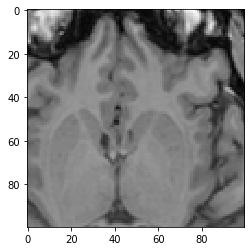

T2 Image (100, 100)


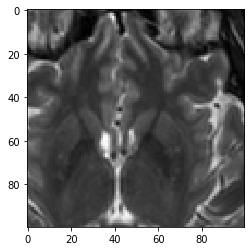

In [235]:
import torch
import nibabel as nib
import imageio
import matplotlib.pyplot as plt
import numpy
import glob
import os
import torch.utils.data.dataset

# NIfTI Dataset
class NIfTIDataset(Dataset):
    
    def load_file_names(self):
        self.t1_files = sorted(glob.glob(os.path.join(self.t1_base_path, '*.nii.gz')))
        self.t2_files = sorted(glob.glob(os.path.join(self.t2_base_path, '*.nii.gz')))
    
    def __init__(self, t1_base_path, t2_base_path, transform):
        self.t1_base_path = t1_base_path
        self.t2_base_path = t2_base_path
        self.load_file_names()
        self.transform = transform
        
    def __getitem__(self, idx):
        self.dataset = (nib.load(self.t1_files[idx]).get_fdata(dtype=numpy.float32), nib.load(self.t2_files[idx]).get_fdata(dtype=numpy.float32))
        return self.transform.transform (self.dataset)
    
    def __len__(self):
        return len(self.t1_files)

class RandomCrop3D:
    
    def __init__(self):
        pass
    
    # Crop a slice for a given x,y coordinates and length and width
    def cropimage(self, img, frame_x, frame_y, frame_x_length, frame_y_length):
        return img[0][frame_y:frame_y_length, frame_x:frame_x_length], img[1][frame_y:frame_y_length, frame_x:frame_x_length]

    # Get a slice
    def getslice(self, img, slce):
        return img[0][:,slce,:], img[1][:,slce,:]
    
    def transform(self, img):
        return self.cropimage(self.getslice(img, 150), 50, 50, 150, 150)

nifti = NIfTIDataset("data/t1/", "data/t2/", RandomCrop3D())

# Get the Dataset
imgdata = nifti.__getitem__(0)

# Display T1
plt.imshow(imgdata[0], cmap="gray")
print ("T1 Image " + str(imgdata[0].shape))
plt.show()

# Display T2
plt.imshow(imgdata[1], cmap="gray")
print ("T2 Image " + str(imgdata[1].shape))
plt.show()